# **Exploratory Data Analysis on the Shark Tank India Season 1**

# Are you ready to dive into the world of Shark Tank India?

In this notebook, we will be exploring the data from the show to answer some interesting questions about the sharks, the deals, and the companies.

We will start by looking at the probability of a deal being made. We will then see which shark is the most likely to invest in a deal, and which industry is the most popular for the sharks to **invest in**.

So sit back, relax, and let's get started!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdyUihCPHXFKuIs44PcAnidHXPGcFbXuqXT61yyZ2cPQ&s)

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [9]:
df=pd.read_csv('Shark Tank India Dataset (1).csv')
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [10]:
df.shape

(117, 28)

In [11]:
df.tail()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
112,34,113,Green Protein,Plant-Based Protein,0,60.0,2.0,3000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
113,34,114,On2Cook,Fastest Cooking Device,0,100.0,1.0,10000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
114,35,115,Jain Shikanji,Lemonade,1,40.0,8.0,500.0,40.0,30.0,...,1,1,1,0,1,0,0,4,10.0,7.5
115,35,116,Woloo,Washroom Finder,0,50.0,4.0,1250.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
116,35,117,Elcare India,Carenting for Elders,0,100.0,2.5,4000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [13]:
df.describe()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [14]:
df.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

# **Percentage of companies which received investment ?**

In [34]:
got_in = df[df['deal_amount'] > 0.0].shape[0]
not_in = df[df['deal_amount'] == 0.0].shape[0]

labels = ["Got Investment", "Not Received Investment"]
values = [got_in, not_in]

fig = px.pie(values=values, names=labels, hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title="Number of Companies which Got Investment or Not -",
                  showlegend=False)

fig.show()

# **Five Shark Deal:**

In [35]:
#Total Shark Deal:
total_shark=df[df["total_sharks_invested"]==5]
figure=px.bar(total_shark, x='brand_name', y='deal_amount',title="Five Shark Deal Brands and the total investment:",text_auto=True, color='pitcher_ask_amount',
                    template="plotly_dark")
figure.show()

From above plot, we get to know that there are all total 4 five shark deal brands and also with the pitcher deal amount and the deal amount of the brand.

# **Highest Pitch Ask Amount:**

In [20]:
#Highest Pitch Ask Amount 
high=df[df["pitcher_ask_amount"]>100]
figure=px.bar(high, x='brand_name', y='pitcher_ask_amount',title="Highest Pitch Ask Amount:",text_auto=True, color='deal_amount',
                    template="plotly_dark")
figure.show()

# **Ask Equity and Deal Equity:**

In [61]:
#Ask Equity and Deal Equity of Highest Pitch Ask AMount Brand
figure=px.bar(high, x='brand_name', y='ask_equity',title="Ask Equity & Deal Equity of Highest Pitch Ask Amount Brand:",text_auto=True, color='deal_equity',
                    template="plotly_dark")
figure.show()

Most of the brand asking for the high amount had not received the investment from the shark, we clearly got to know by the blue color plot which shows that no deal happened except "Aas Vidyalaya".

![](https://indianmemetemplates.com/wp-content/uploads/main-abhi-tak-shock-mein-hu.jpg)

# **Least Pitch Amount Asked:**

In [62]:
#Least Pitch Amount Asked 
low=df[df["pitcher_ask_amount"]<20]
figure=px.bar(low, x='brand_name', y='pitcher_ask_amount',title="Lowest Pitch Ask Amount:",text_auto=True, color='deal_amount',
                    template="plotly_dark")
figure.show()

Among the lowest pitch amout made by the brands, only "Cocofit" and "Watt Technovations" got the investment.

The lowest amount pitch which sharks had made deal was Cocofit and Watt Technovations.

# **No. of brands the sharks have invested:**

In [63]:
#No. of brands the sharks have invested:
num_deal_shark=[df.ashneer_deal.sum(), df.anupam_deal.sum(), df.aman_deal.sum(), df.namita_deal.sum(), df.vineeta_deal.sum(), df.peyush_deal.sum(), df.ghazal_deal.sum()]
all_sharks=["Ashneer", "Anupam", "Aman", "Namita", "Vineeta", "Peyush", "Ghazal"]
figure=px.bar(total_shark, x=all_sharks, y=num_deal_shark,title="Number of deals done by individual shark:",color=all_sharks,text_auto=True,
                    template="plotly_dark")
figure.show()

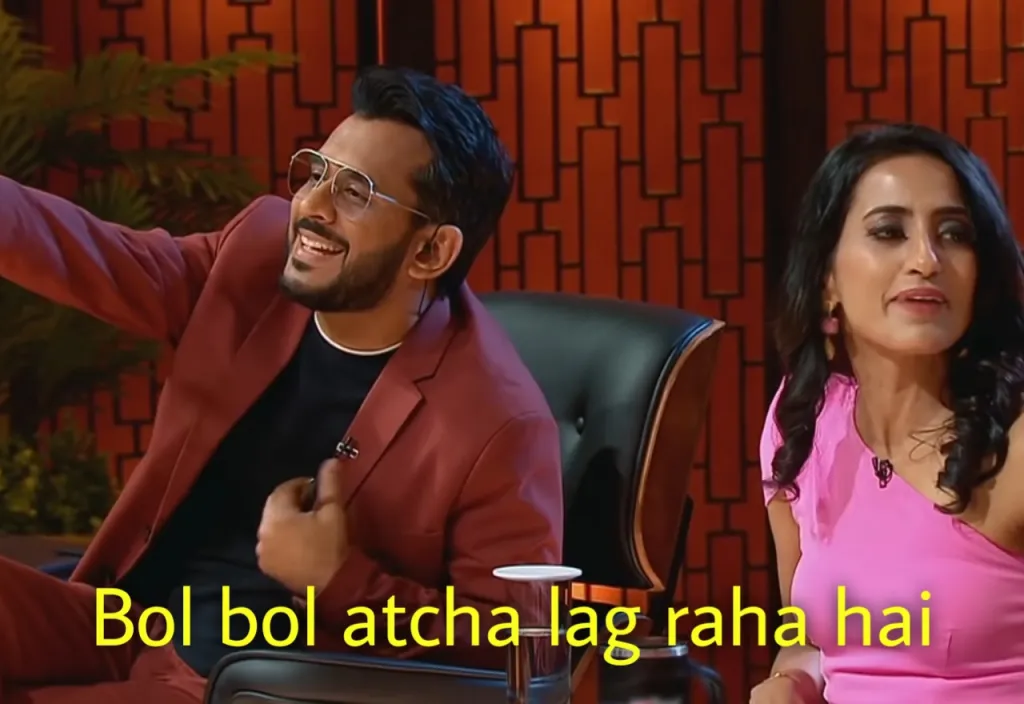

# **Above 50% Equity taken by the shark in which brand:**

In [26]:
#Above 50% Equity taken by the shark in which brand?:
df_equity=df[df['equity_per_shark']>=50]
figure=px.bar(df_equity, x='brand_name', y='equity_per_shark',title="Above 50% Equity taken by the shark in which brand:",text_auto=True, color='deal_amount',
                    template="plotly_dark")
figure.show()

# **Equity Offered by entrepreneurs to the investors in deals**

In [25]:
# How much equity is offered by entrepreneurs to the investors in the deals (Avg)
average_equity = df['deal_equity'].mean()
print(f"The average equity offered by entrepreneurs to investors on Shark Tank India is: {average_equity:.2f}")

The average equity offered by entrepreneurs to investors on Shark Tank India is: 8.96


# **Average amount invested in the deals made**

In [22]:
# Average amount invested in the deals made
average_investment = df['deal_amount'].mean()
print(f"The average amount invested in the deals made on Shark Tank India is: {average_investment}")

The average amount invested in the deals made on Shark Tank India is: 31.982915042735044


# **Correlation between the pitchers asking valuation and the actual deal valuation**

In [24]:
# Correlation between the pitchers asking valuation and the actual deal valuation in the deals

figure = px.scatter(df, x='ask_valuation', y='deal_valuation',
                 labels={'ask_valuation': "Pitchers' Asking Valuation",
                         'deal_valuation': "Actual Deal Valuation"},
                 title="Correlation between Pitchers' Asking Valuation and Actual Deal Valuation",
                 color='deal_amount',
                 color_continuous_scale='Viridis', 
                 hover_name='brand_name'
                 )

figure.update_layout(template='plotly_dark')

figure.show()

# **Success Rate of Deals Made by Shark**

In [27]:
# Success Rate of Deals Made by Shark

total_deals_by_shark = df[['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']].sum()
successful_deals_by_shark = df[df['deal'] == 1][['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']].sum()
success_rate_by_shark = (successful_deals_by_shark / total_deals_by_shark) * 100
bar_colors = ['rgb(65,105,225)', 'rgb(144,238,144)', 'rgb(218,165,32)', 'rgb(199,21,133)', 'rgb(255,140,0)', 'rgb(75,0,130)', 'rgb(255,0,0)']

figure = go.Figure(data=go.Bar(
    x=success_rate_by_shark.index,
    y=success_rate_by_shark,
    marker=dict(color=bar_colors),
    hovertemplate='Success Rate: %{y:.2f}%<br><extra></extra>'
))

figure.update_layout(
    title="Success Rate of Deals Made by Shark",
    xaxis_title="Shark",
    yaxis_title="Success Rate (%)",
    template='plotly_dark'
)

figure.show()

# **Realtionship between Ask Valuation and Ask Equity made by entreprenuer**

In [31]:
# Realtionship between Ask Valuation and Ask Equity made by entreprenuer

figure = px.scatter(df, x='ask_valuation', y='ask_equity',
                 labels={'ask_valuation': "Pitch Valuation",
                         'ask_equity': "Equity Offered"},
                 title="Relationship between Pitch Valuation and Equity Offered on Shark Tank India",
                 trendline="ols", 
                 hover_name='brand_name')

figure.update_layout(template='plotly_dark')

figure.show()


# **Relationship between Pitch Valuation, Equity Offered, and Deal Amount**

In [36]:
# Relationship between Pitch Valuation, Equity Offered, and Deal Amount

figure = go.Figure(data=[go.Scatter3d(
    x=df['ask_valuation'],
    y=df['ask_equity'],
    z=df['deal_amount'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['deal_amount'],
        colorscale='Viridis',
        opacity=0.8
    ),
    hovertemplate='<b>Brand:</b> %{text}<br>'
                  '<b>Pitch Valuation:</b> %{x}<br>'
                  '<b>Equity Offered:</b> %{y}<br>'
                  '<b>Deal Amount:</b> %{z}<br><extra></extra>',
    text=df['brand_name']
)])

figure.update_layout(
    title="Relationship between Pitch Valuation, Equity Offered, and Deal Amount",
    scene=dict(
        xaxis_title="Pitch Valuation",
        yaxis_title="Equity Offered",
        zaxis_title="Deal Amount"
    ),
    template='plotly_dark'
)

figure.show()


# **Comparision of Successful Pitches and Unsuccessful Pitches**

![](https://img.memegenerator.net/instances/81250681.jpg)


In [33]:
# Comparision of Successful Pitches and Unsuccessful Pitches

successful_pitches = df[df['deal'] == 1]
unsuccessful_pitches = df[df['deal'] == 0]
successful_mean_valuation = successful_pitches['ask_valuation'].mean()
unsuccessful_mean_valuation = unsuccessful_pitches['ask_valuation'].mean()

figure = px.bar(x=['Successful Pitches', 'Unsuccessful Pitches'],
             y=[successful_mean_valuation, unsuccessful_mean_valuation],
             color=['Successful Pitches', 'Unsuccessful Pitches'],
             color_discrete_sequence=['rgb(65,105,225)', 'rgb(144,238,144)'],
             labels={'x': '', 'y': 'Average Valuation'},
             template='plotly_dark')

figure.update_layout(title='Average Valuation of Successful vs Unsuccessful Pitches')

figure.show()


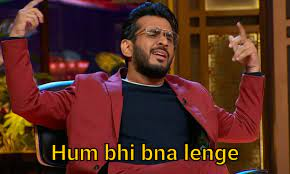